## Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction

__Scipy__ is one of the most popular libraries available in python. It is mostly used for Scientific computing, it extends the NumPy module providing additional tools for working with arrays, inbuilt algorithms implementing interpolation, optimization algorithms, minimization problems, solving differential equations, and eigenvalue problems, etc. It also provides various data structures like Sparse matrices, k-dimensional trees, etc.

In this notebook we will be going through some of the inbuilt functions available under **Scipy** module mainly **curve_fit**, **optimise**, **interpolation**, solving **differential equations**. Hoping that you're well versed with **Numpy** module since we will be using some of the numpy functions to make our life easier 😁

### Curve Fitting

Scipy has a function **curve_fit** available under **scipy.optimize** which uses least squares error to fit a curve to a data. Consider you are given with a function, x values and the y values respectively. The curve_fit method enables you to find all the important coefficients in the function so that you can fit the function to your data efficiently.

Here we will be using the function $y=ae^{-x} + bsin(x)$, our main task would be to be able to compute the coefficients a, b respectively.

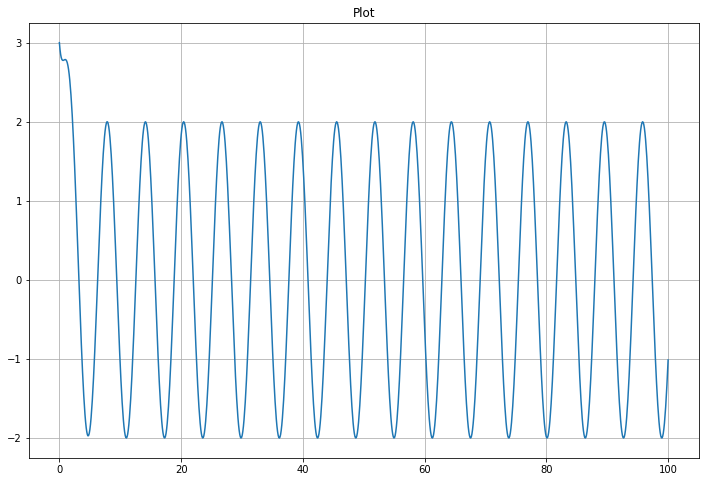

In [2]:
def func1(x):
    return 3*np.exp(-x) + 2*np.sin(x)

# same function but the paarameters a, b are to be computed via scipy's curve_fit
def func2(x, a, b):
    return a*np.exp(-x) + b*np.sin(x)

x = np.linspace(0, 100, 1000)
y = func1(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.title("Plot")
plt.grid()
plt.show()

The parameters of the function are 3.0 and 2.0


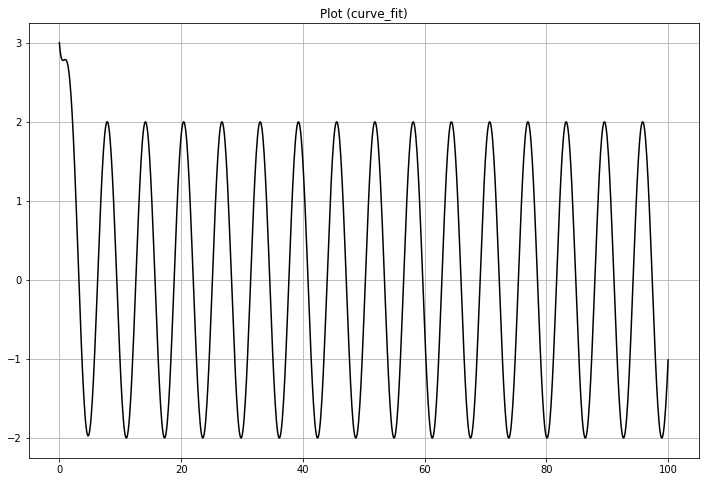

In [5]:
# Using the curve_fit method
from scipy.optimize import curve_fit

# popt contains the values of the coefficients of the equation 
# pcov contains the covariance between the parameters
# p0 represents a starting value for the algorithm to proceed

popt, pcov = curve_fit(func2, x, y, p0=(1,1))
a, b = popt
y_scipy = func2(x, a, b)
print("The parameters of the function are {} and {}". format(a, b))

plt.figure(figsize=(12, 8))
plt.plot(x, y_scipy, color="black")
plt.title("Plot (curve_fit)")
plt.grid()
plt.show()

### Interpolation

**Interpolation** is extremely used in astronomical data. It is a technique used for construction of new data points based on the nature of already known data points. Various experiments or sampling represents the value of a function on a limited number of data points of the independent variable and interpolation helps to estimate functional value at intermediate points. It helps in joining discontinuous functions.

Scipy offeres various interpolation techniques like linear, cubic, spline, biquadratic etc..

Here we will be using the function $y = x^{3}cos(x) + sin(x^2) + e^{-x^{3}}$ for demonstration

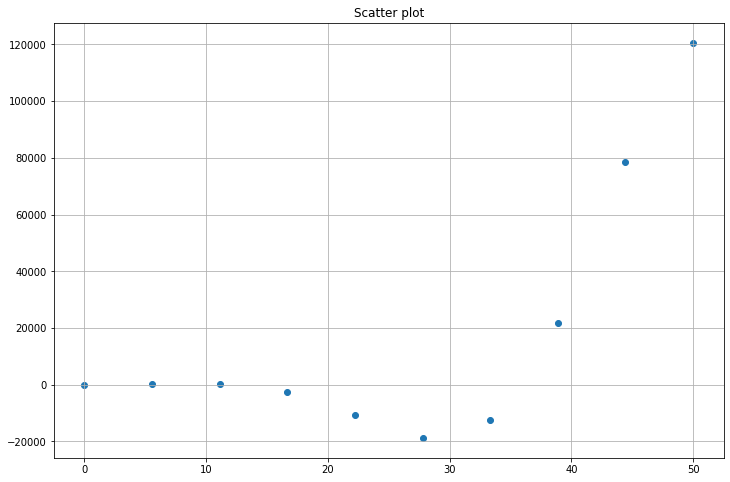

In [6]:
from scipy.interpolate import interp1d

x = np.linspace(0, 50, 10)
y = x**3*np.cos(x) + np.sin(x**2) + np.exp(-x**3) 

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.title("Scatter plot")
plt.grid()
plt.show()

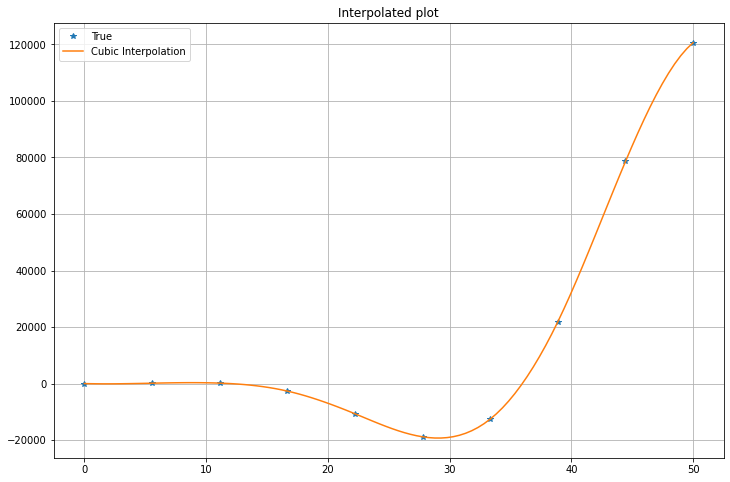

In [9]:
# using cubic interpolation
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 50, 100)
y_interpolated = f(x_dense)

#plotting the function 
plt.figure(figsize=(12, 8))
plt.plot(x, y, "*", x_dense, y_interpolated)
plt.legend(["True", "Cubic Interpolation"])
plt.title("Interpolated plot")
plt.grid()
plt.show()

### Spline Interpolation
**Spline** interpolation is preferred over normal polynomial interpolations since spline interpolation fits low-degree polynomials to small subsets of the values. Using spline interpolation over polynomial methods, the interpolation errors can be made as low as possible by fitting multiple low-degree polynomial over subset of values.

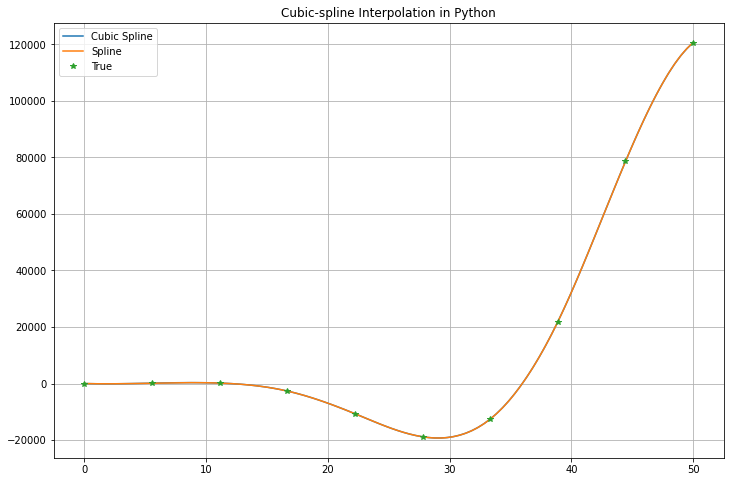

In [12]:
from scipy.interpolate import splev, splrep

x = np.linspace(0, 50, 10)
def f(x):
    return x**3*np.cos(x) + np.sin(x**2) + np.exp(-x**3) 

# To find the spline representation of a curve in a 2-D plane using the scipy.interpolate.slprep
# s represents smoothing. Larger s means more smoothing while smaller values of s indicate less smoothing.
# der = order of spline derivative
t = splrep(x, y, s=0)
xnew = np.linspace(0,50,200)
ynew = splev(xnew, t, der=0)
  
plt.figure(figsize=(12, 8))
  
# plt.plot(x, f(x))
plt.plot(x_dense, y_interpolated, xnew, ynew, x, y, "*")
  
plt.legend(['Cubic Spline', 'Spline', 'True'])
plt.title('Cubic-spline Interpolation in Python')
plt.grid()
plt.show()

### Minimisation problems

Scipy's **minimize** method helps in minimizing both constrained and non-constrained problems involving multiple scalar variables.

Lets take the function $y = -8 + x^2sin(x) + xcos(x)$

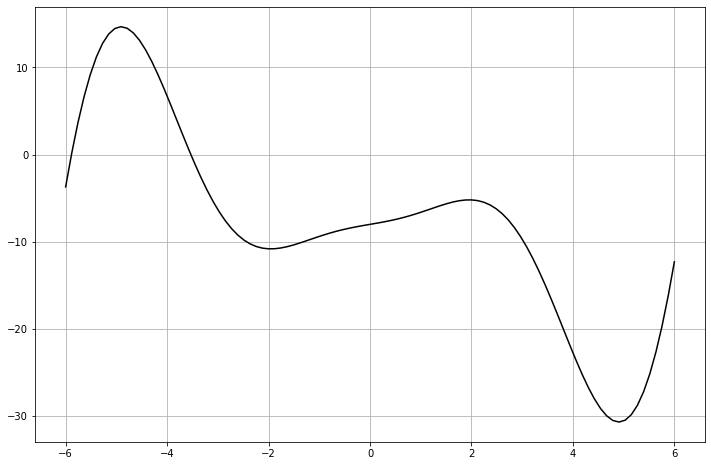

      fun: -10.810615923890126
 hess_inv: array([[0.17348874]])
      jac: array([9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 12
   status: 0
  success: True
        x: array([-1.9558838])


In [17]:
from scipy.optimize import minimize

def fun(x):
    return -8 + x**2*np.sin(x) + x*np.cos(x)

x = np.linspace(-6, 6, 100)

plt.figure(figsize=(12, 8))
plt.plot(x, fun(x), color="black")
plt.grid()
plt.show()

#calculating the x value within [-6, 6] at which local minimum occurs
res = minimize(fun, 0)
print(res)

### DIfferentiation and Integration 

Here I will be demonstrating how to differentiate the above function using __derivative__ function available under scipy.misc class. Integration also can be accomplished using **quad, dblquad** functions available under **scipy.integrate** class.

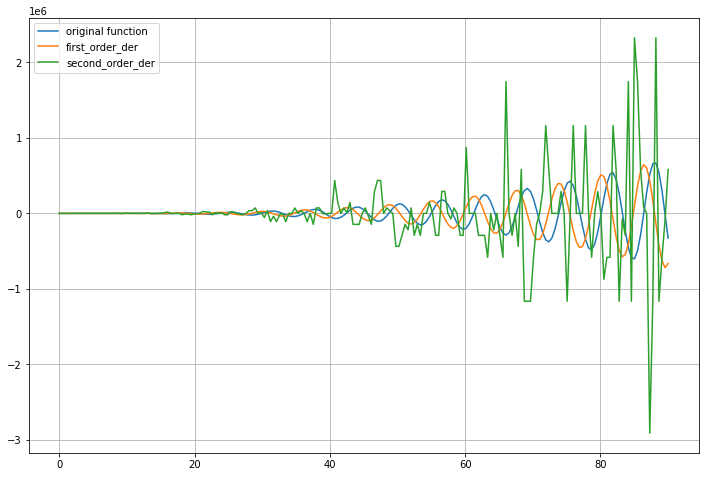

In [20]:
from scipy.misc import derivative

def f(x):
    return x**3*np.cos(x) + np.sin(x**2) + np.exp(-x**3) 

x = np.linspace(0,90,200)
y = f(x)

first_order = derivative(f, x, dx=1e-8)
second_order = derivative(f, x, dx=1e-8, n=2, order=3)

plt.figure(figsize=(12, 8))
plt.plot(x, y, x, first_order, x, second_order)
plt.legend(['original function', 'first_order_der', 'second_order_der'])
plt.grid()
plt.show()

Here the function used to demonstrate integration throgh scipy.integrate is $$ \int_{-1}^{1} \int_{-x}^{x^3} xcos(x^{2}y + y) $$

In [21]:
from scipy.integrate import dblquad

func = lambda x, y: x*np.cos(x**2*y + y)
lower_lim = lambda x: -x
upper_lim = lambda x: x**3
integral, integral_error = dblquad(func, -1, 1, lower_lim, upper_lim)
print("The resulting value of the Integral is {}".format(integral))
print("The integral estimation error is around {}".format(integral_error))

The resulting value of the Integral is -0.10907103501754811
The integral estimation error is around 4.5220533492418215e-09


### Fourier Transform

Fourier transform helps to convert a time varying discrete or continuous signa from time domain to frequency domain. For example you are given with an astronomical data containing the intensity of flares with respect to time, performing fourier transform on the signal will reveal all the dominant frequency and its corresponding higher harmonics in the signal received.

$y[k]$ represents signal in frequency domain and $x[n]$ represents signal in time domain

$k/N$ represents dimensionless frequency

$$y[k] = \sum_{n=0}^{N-1} e^{2\pi i k n/N} x[n]$$

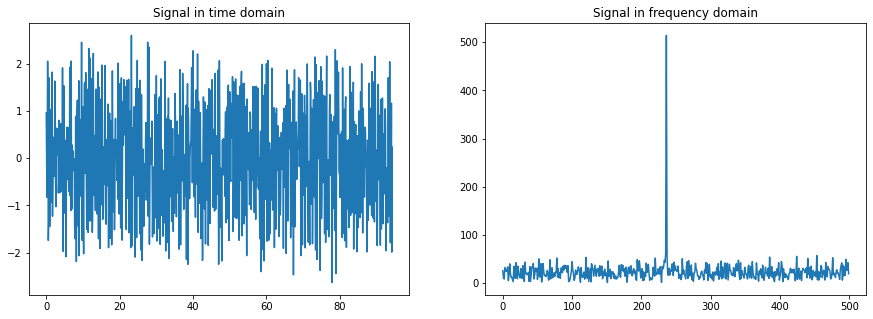

In [22]:
from scipy.fft import fft, fftfreq

t = np.linspace(0, 30*np.pi, 1000)
x = np.sin(4*np.pi*t**2) + np.cos(5*np.pi*t) + 0.3*np.random.randn(len(t))
N = len(x)
y = fft(x)[:N//2]#calculating the fourier transform and eliminating the mirror image part by taking half of it.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(t, x)
ax1.set_title("Signal in time domain")
ax2.plot(np.abs(y))
ax2.set_title("Signal in frequency domain")

### Differential Equations

Scipy provides various methods to compute differential equations both ODE and PDEs. Here I will demonstrate by solving an ODE using odeint method under scipy.integrate

ODE:     &emsp; &emsp; &emsp; $y^{'} - 3y^{3} + 2y^{2} - 505 = 0$   &emsp;    $y(0) = -2$

C:\Users\Adit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


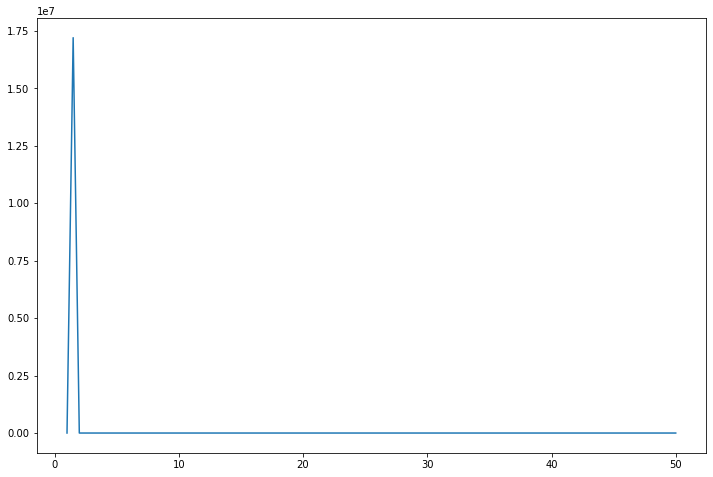

In [23]:
from scipy.integrate import odeint

x = np.linspace(1, 50, 100)
def ydiff(y, x):
    return 3*y**3 - 2*y**2 + 505

y0 = -2
y = odeint(ydiff, y0, x) 

plt.figure(figsize=(12, 8))
plt.plot(x, y.T[0])
plt.show()

There are so many functions to explore in **Scipy**.I would prefer to go through its official documentation [Scipy Docs](https://scipy.github.io/devdocs/index.html)

Peace ✌️✌️